In [4]:
import numpy as np
import matplotlib.pyplot as plt
def U4(u):
    return np.array([
        (1-u)**3,
        3*u*((1-u)**2),
        3*(u**2)*(1-u),
        u**3
    ]).reshape(1, 4)
def U3(u):
    return np.array([
        (1-u)**2,
        2*u*(1-u),
        u**2
    ]).reshape(1, 3)
def V4(v):
    return np.transpose(np.array([
        (1-v)**3,
        3*v*((1-v)**2),
        3*(v**2)*(1-v),
        v**3
    ])).reshape(4, 1)
def V3(v):
    return np.array([
        (1-v)**2,
        2*v*(1-v),
        v**2
    ]).reshape(3, 1)
def bezier_patch(points, m, U_func, V_func):
    X = points[:, :, 0]
    Y = points[:, :, 1]
    Z = points[:, :, 2]

    u_steps = np.arange(0, 1+1/m, 1/m)
    v_steps = np.arange(0, 1+1/m, 1/m)

    S = np.array([])
    for u in u_steps:
        u_result = U_func(u)
        x_temp = np.dot(u_result, X)
        y_temp = np.dot(u_result, Y)
        z_temp = np.dot(u_result, Z)
        for v in v_steps:
            v_result = V_func(v)
            x = np.dot(x_temp, v_result)
            y = np.dot(y_temp, v_result)
            z = np.dot(z_temp, v_result)
            point = np.array([x, y, z]).reshape(3)
            S = np.append(S, point)
    S = S.reshape(m+1, m+1, 3)
    Sx = S[:, :, 0]
    Sy = S[:, :, 1]
    Sz = S[:, :, 2]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(Sx, Sy, Sz, cmap=plt.get_cmap())
    plt.show()

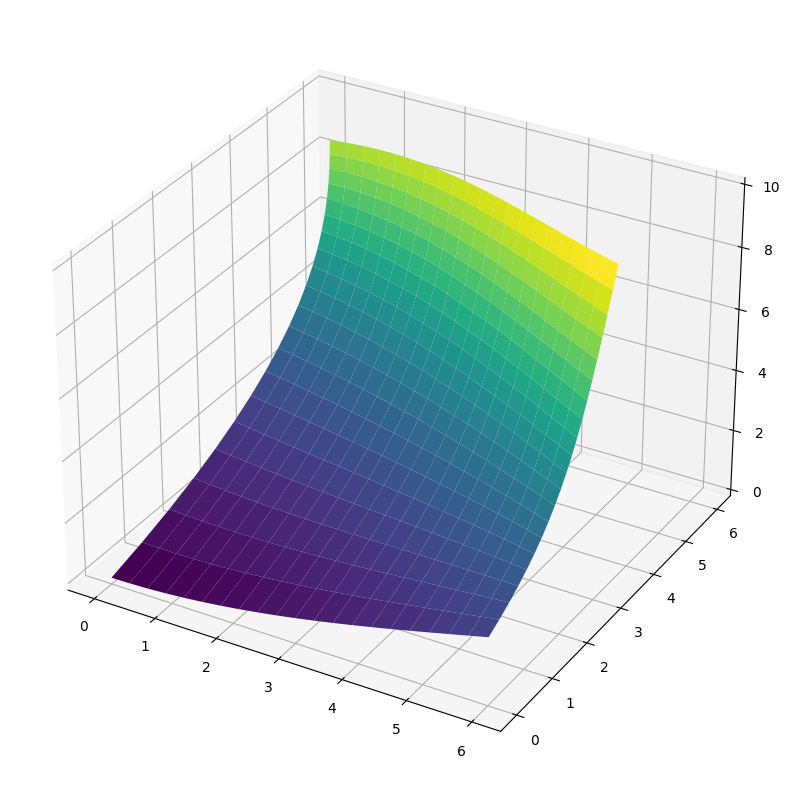

In [5]:
P1 = np.array([
    [
        [0, 0, 0],
        [0, 5.5, 2],
        [0, 6, 5.5],
        [0, 6, 8.5]
    ],

    [
        [2, 0, 0],
        [2, 4.5, 2.5],
        [2, 5.5, 5.5],
        [2, 6, 9]
    ],

    [
        [4, 0, 1],
        [4, 3.5, 3],
        [4, 4, 5.5],
        [4, 4.5, 9.5]
    ],

    [
        [6, 0, 2],
        [6, 2, 3.5],
        [6, 2.5, 5.5],
        [6, 3.5, 10]
    ]
])
bezier_patch(P1, 20, U4, V4)

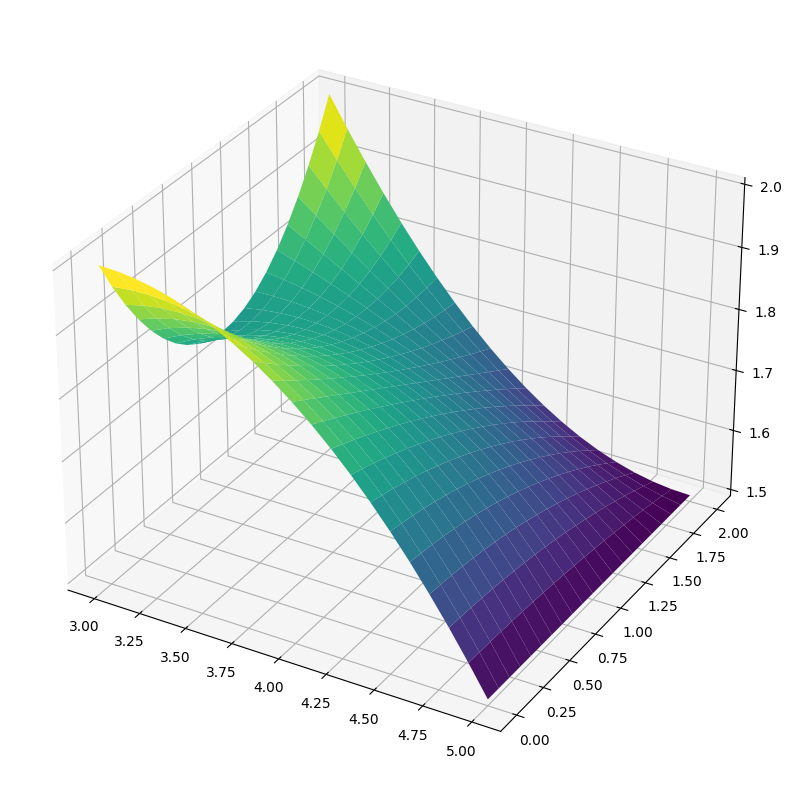

In [6]:
P2 = np.array([
    [
        [3, 2, 2],
        [4, 2, 1.5],
        [5, 2, 1.5],
    ],
    [
        [3, 1, 1.5],
        [4, 1, 2],
        [5, 1, 1.5],
    ],
    [
        [3, 0, 2],
        [4, 0, 2],
        [5, 0, 1.5],
    ]
])
bezier_patch(P2, 20, U3, V3)